# Práctico 4 - Procesamiento Digital de Imágenes

In [80]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))



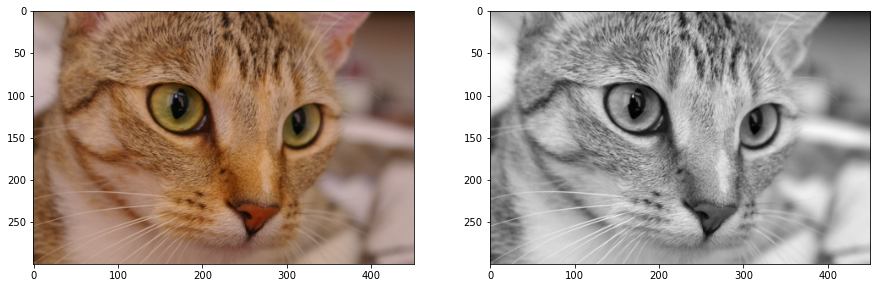

In [82]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

# 1. Transformada Discreta de Fourier 

1. Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. Mostrar el módulo en escala logarítmica
2. Encuentre una transformada para la amplitud y una para la fase que permita guardar el espectro en imágenes de 8 bit perdiendo la menor cantidad de información posible
3. Implementar la transformada inversa que convierta el espectro guardado en imágenes de 8 bit en la imagen original 
4. Calcular el error medio cuadrático de ir y volver a la imagen de 8bit
5. Guardar tp4.png como tp4_amp.png y tp4_phase.png. Corregir la tp4_amp.png con MS Paint o similar. Leer el espectro modificado y reconstruir la imagen.

In [83]:
# fooplot
# np.fft.fft2 help

In [84]:
X = np.fft.fftshift(np.fft.fft2(img))

In [85]:
N, M = img.shape

In [86]:
Xm = np.abs(X)
Xp = np.angle(X)

In [87]:
#aplico el ln para poder visualizar
Xm = np.log(Xm + 10) / (N * M)
#Xm = Xm/Xm.max()

#guardar espectro y fase para luego editarlo en paint.
#cargo la imagen editada y:

#calculo la inversa de la función anterior, esta la uso para cuando cargue la foto del espectro editado.
Rm = np.exp(Xm*N * M) - 10

#luego debería antitransformar y encuentro la imagen corregida.

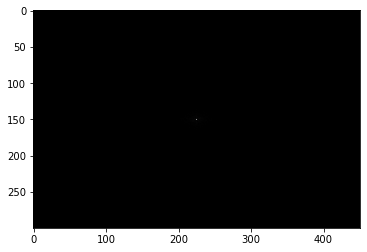

In [88]:
#plt.imshow(Xm, 'gray')
#plt.imshow(Xm, 'gray')

plt.imshow(Rm, 'gray')


In [89]:
#plt.imshow(Ym, 'gray')
import math

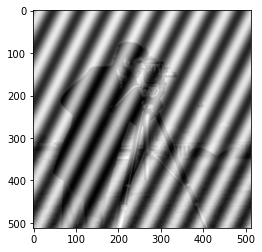

In [90]:
#CARGO LA IMAGEN A MEJORAR
img2 = imageio.imread('tp4.png')/255
#print(img2)
plt.imshow(img2 , 'gray')

In [91]:
J, K = img2.shape
Y = np.fft.fftshift(np.fft.fft2(img2)) #TDF de img2 * J*K


(512, 512)

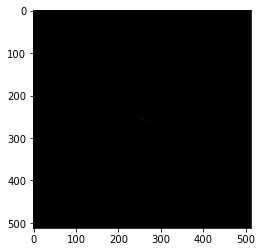

In [92]:
#espectro de la imagen
Ym = (np.abs(Y))*1/(J*K) # amplitud de la transformada discreta de fourier
#Yp = (np.angle(Y)+ math.pi)*(255/math.pi) #fase de la TDF
Yp = np.angle(Y)
plt.imshow(Ym, 'gray')

#print(Ym)
np.shape(Ym)

In [93]:
#Defino algunas variables para la transformación logaritmica

alfa = 100000
beta = 1

#aplico el ln para poder visualizar
Ym = np.log((alfa*Ym) + beta)/np.log(alfa+beta) #ln(amplitud de TDF +10)

In [94]:
Ym.max()
Ym.min()

0.00012263040811196266

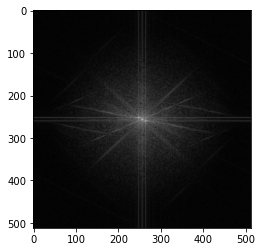

In [95]:
#grafico de el log(ampl(tdf)+10) la ampliud del espectro transformado
plt.imshow(Ym, 'gray')
#print(Ym)


In [97]:
#guardo esta amplitud

def imsave(fname,array):
    imageio.imsave(fname,(array*255).astype(np.uint8))

#imsave('tp4_amp.png', Ym)    

imageio.imsave('tp4_amp.png', np.uint8(Ym*255), 'png')

In [98]:
#en este punto edito con paint la Amplitud del del espectro, pintanto los puntos blancos

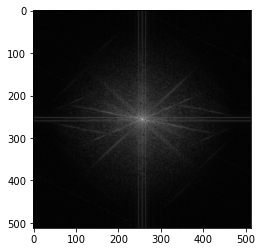

In [99]:
#cargo la amplitud del espectro editado

A = imageio.imread('tp4_amp1.png')/255

A = A[:,:,0]
plt.imshow(A, 'gray')
#print(A)


(512, 512)
La antitransformada es:


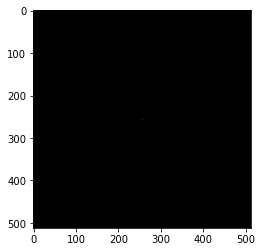

In [100]:
#aplico la funcion inversa:
#será la nueva amplitud del nuevo espectro
Rm = (np.exp(A*np.log(alfa+beta)) - beta)/(alfa)
plt.imshow(Rm, 'gray')
#dimensiones de la nueva amplitud
print(np.shape(Rm))

#antitransformo
#defino la raiz cuadrada de menos 1
import cmath
j = cmath.sqrt(-1)
#nuevo expectro expresado como tdf = A * exp(j*tita)
var =  abs(Rm) * (np.exp(j * Yp))

#primero pongo el punto blanco en la esquina izquierda
#luego antitransformo y aplico valor absoluto
antiT = J*K*abs(np.fft.ifft2(np.fft.ifftshift(var)))

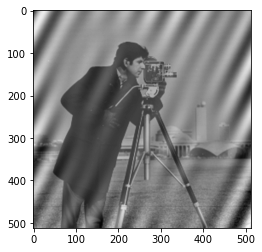

In [101]:
#muestro la imagen mejorada
plt.imshow(antiT, 'gray')

In [102]:
rmse(A,img2)

0.5211805826579651